# <H1>**California Housing Price Prediction**
<h4 style='text-align: right;'> by: Rahma Aurellya </h2>



# **Contents:**
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modelling
5. Conclusion
6. Recommendation

## **Business Problem Understanding**

**Context**

The data contains information from the 1990 California census. So, although it may not help you with predicting current housing prices, it does provide an accessible introduction dataset for teaching people about the basics of machine learning.

Perusahaan properti ternama yaitu PT. Tinggal Sana-Sini, akan membuka cabang baru di California pada tahun 2024. Diketahui bahwa California merupakan negara bagian dengan populasi terbesar dan negara bagian yang memiliki Gross State Product sebesar $3.89 Triliun yang juga terbesar  di Amerika Serikat. Besarnya tingkat perekonomian di California sebagai negara bagian dapat menyaingi negara dunia lainnya dan mendapati posisi lima besar jika dilihat dari nilai Gross Domestic Product.

Ekonomi tinggi dan jumlah populasi yang tinggi menyebabkan California menjadi salah satu negara bagian yang memiliki nilai properti yang mahal di Amerika Serikat. Populasi yang kian meningkat, keterbatasan lahan untuk ditinggali, serta tingginya permintaan tempat tinggal menyebabkan meroketnya harga-harga properti di California. 

**Problem Statement**

PT. Tinggal Sana Sini hanya memiliki data dari hasil sensus California tahun 1990 yang dapat digunakan sebagai pedoman untuk melakukan prediksi harga properti di California. Tingginya permintaan akan suatu properti dapat mempengaruhi harga properti sehingga harga jual dapat melambung dan tidak sesuai dengan fasilitas yang tersedia dari suatu properti. Maka dari itu PT Tinggal Sana Sini perlu memprediksi nilai suatu properti yang ideal dilihat dari sarana dan fasilitas dari properti. Menentukan nilai properti dengan tepat, diharapkan dapat meningkatkan keuntungan dan mampu menjual properti dengan cepat kepada konsumen.

**Goals**

Mengetahui nilai properti yang ideal secara akurat dengan mempertimbangkan berbagai faktor seperti ukuran properti, lokasi properti, fasilitas yang tersedia, serta karakteristik demografi penduduk California. Dibutuhkan 'alat' untuk melakukan prediksi harga rumah yang tepat yang dapat ditawarkan oleh agen properti dan dapat diterima oleh masyarakat. Sebuah alat prediksi dapat membantu baik pihak customer atau agen properti untuk memprediksi harga rumah yang fair dan adil bagi kedua belah pihak dengan mengukur beberapa faktor yang mempengaruhi harga suatu rumah pada kawasan tertentu.

**Analytic Approach**

Diperlukan analisa data set yang diperoleh terlebih dahulu guna mendapatkan fitur-fitur yang dapat mempengaruhi harga suatu rumah. Kemudian, membentuk model regresi yang dapat memprediksi harga rumah di California yang berguna bagi agen properti untuk menentukan harga jual rumah pada tiap kawasan di California. 

Lakukan analisa and deskripsiin flownya etc lah pokoknya

**Metric Evaluation**

Metric evaluasi yang digunakan sebagai pedoman utama pada model berikut ini adalah MAPE (Mean Absolute Percentage Error) serta metric pendukungnya yaitu RMSE (Root Mean Squarred Error) dan MAE (Mean Absolute Error). Semakin kecil nilai MAPE menunjukkan tingkat akurasi prediksi harga rumah di California yang semakin baik. 

**Data Features:**

Berikut kolom-kolom informasi yang tersedia untuk digunakan sebagai feature dalam melakukan modelling machine learning.
|**No.**|**Column Name**|**Data Type**|**Description**|
|:---:|----|----|----|
|1.|`longitude`|float64|Titik koordinat garis bujur kawasan perumahan|
|2.|`latitude`|float64|Titik kooordinat gari lintang kawasan perumahan|
|3.|`Housing median age`|float64|Median usia rumah pada suatu kawasan perumahan|
|4.|`total_rooms`|float64|Jumlah ruangan secara keseluruhan pada kawasan perumahan|
|5.|`total_bedrooms`|float64|Jumlah kamar tidur secara keseluruhan pada kawasan perumahan| 
|6.|`population`|float64|Jumlah populasi pada suatu kawasan perumahan|
|7.|`househoolds`|float64|Jumlah keluarga/rumah tangga yang berada pada suatu kawasan perumahan|
|8.|`median_income`|float64|Median pendapatan penduduk pada kawasan perumahan dalam bentuk puluhan ribu US Dollar|
|9.|`median house value`|float64|Median harga rumah pada suatu kawasan perumahan dalam bentuk satuan US Dollar|
|10.|`ocean_proximity`|object64|Kategori lokasi rumah dilihat dari jarak rumah ke laut|

## **Data Understanding**


In [45]:
# Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [47]:
rawData = []

for col in df.columns:
    rawData.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df)*100),2), df[col].nunique(), list(df[col].unique())])

dataDesc = pd.DataFrame(columns=['columnName', 'dataType', 'nullValue', '%nullValue', 'nUnique', 'sampleUnique'], data=rawData)
dataDesc

,columnName,dataType,nullValue,%nullValue,nUnique,sampleUnique
0,longitude,float64,0,0.00,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, ..."
1,latitude,float64,0,0.00,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6..."
2,housing_median_age,float64,0,0.00,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0..."
3,total_rooms,float64,0,0.00,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0..."
4,total_bedrooms,float64,137,0.95,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14..."
5,population,float64,0,0.00,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ..."
6,households,float64,0,0.00,1649,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14..."
7,median_income,float64,0,0.00,9797,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8..."
8,ocean_proximity,object,0,0.00,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]"
9,median_house_value,float64,0,0.00,3548,"[47500.0, 100000.0, 285800.0, 175000.0, 59200...."


In [48]:
#Check on duplicated data
duplicate = df.duplicated().sum()

if duplicate > 0:
    print(f'There are {duplicate} duplicated rows')
else:
    print(f'There are {duplicate} duplicated rows. No duplicate, all rows unique. ')

There are 0 duplicated rows. No duplicate, all rows unique. 


In [49]:
# Show the information and the shape of Data Frame of Transjakarta
print(f'Dataset California Housing Price memiliki jumlah baris {df.shape[0]} dan jumlah kolom {df.shape[1]}')

Dataset California Housing Price memiliki jumlah baris 14448 dan jumlah kolom 10


**Summary Dataset:**
1. Dataset memiliki 14.448 baris dengan kolom sebanyak 10 kolom
2. Missing Value ditemukan pada kolom `total_bedrooms` sebesar 0.95% dan karena jumlahnya yang relatif rendah, maka data missing value akan dihapus.
3. Tidak ditemukan adanya duplikasi data entries yang diberikan.
4. **Feature Data Numerikal:**
    - `longitude`
    - `latitude`
    - `housing_median_age`
    - `total_rooms`
    - `total_bedrooms`
    - `population`
    - `households`
    - `median_income`
5. **Feature Data Kategorikal:**
    - `ocean_proximity`
6. **Nilai yang Ingin di Prediksi:**
    - `median_house_value`

### **Data Preparation**

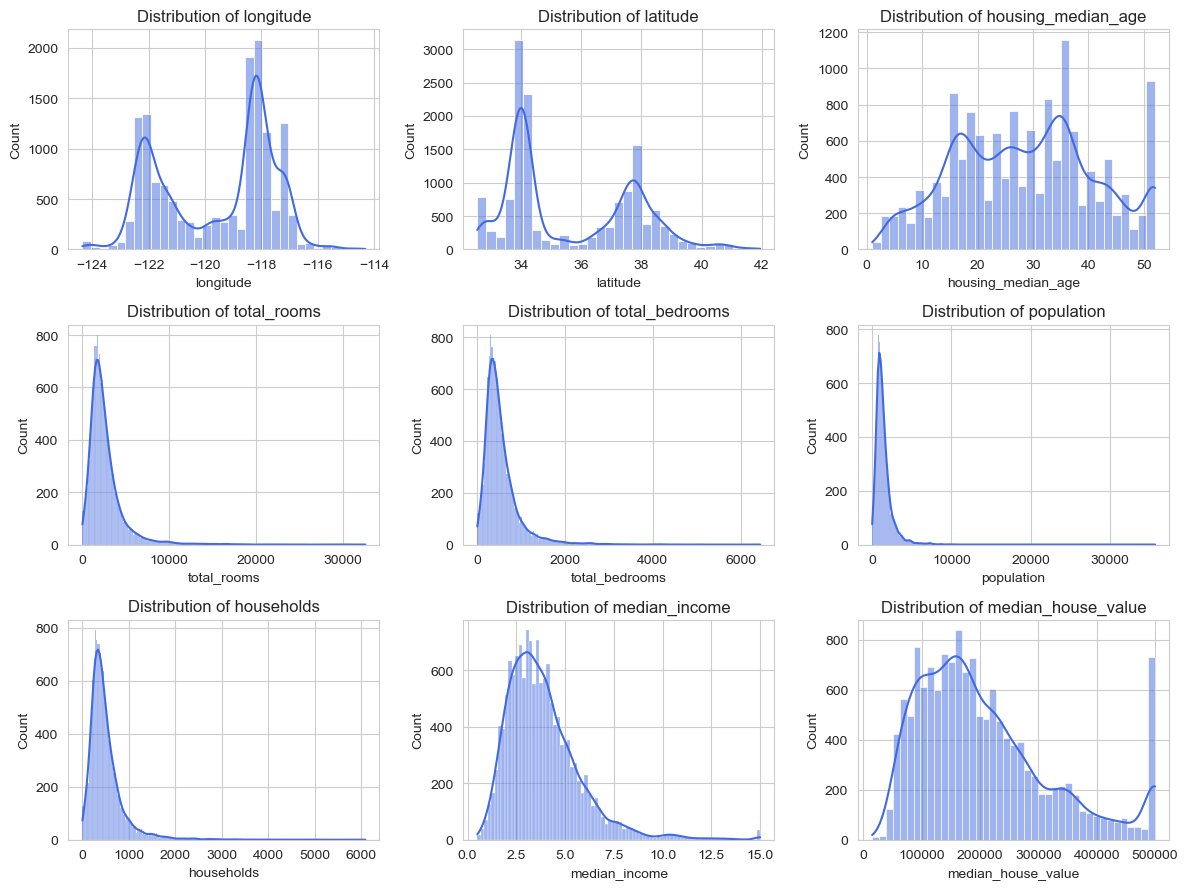

In [50]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

for idx, col in enumerate(df.select_dtypes(include=['float64'])):
    
    sns.histplot(data=df, x=col, kde=True, color='royalblue', ax=axes[idx//3, idx%3])
    axes[idx//3, idx%3].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


Jika dilihat dari sebaran data numerikal pada dataset California, terlihat bahwa masing-masing kolom memiliki sebaran yang tidak terdistribusi secara normal. Selanjutnya diperlukan untuk melihat korelasi antar kolom untuk mengetahui hubungan dari tiap-tiap kolom pada dataset.

In [51]:
# Check Category based on Ocean Proximity
category = df['ocean_proximity'].value_counts().reset_index()
category['percentage'] = round((category['count']/category['count'].sum()*100), 2)
category

,ocean_proximity,count,percentage
0,<1H OCEAN,6369,44.08
1,INLAND,4576,31.67
2,NEAR OCEAN,1879,13.01
3,NEAR BAY,1622,11.23
4,ISLAND,2,0.01


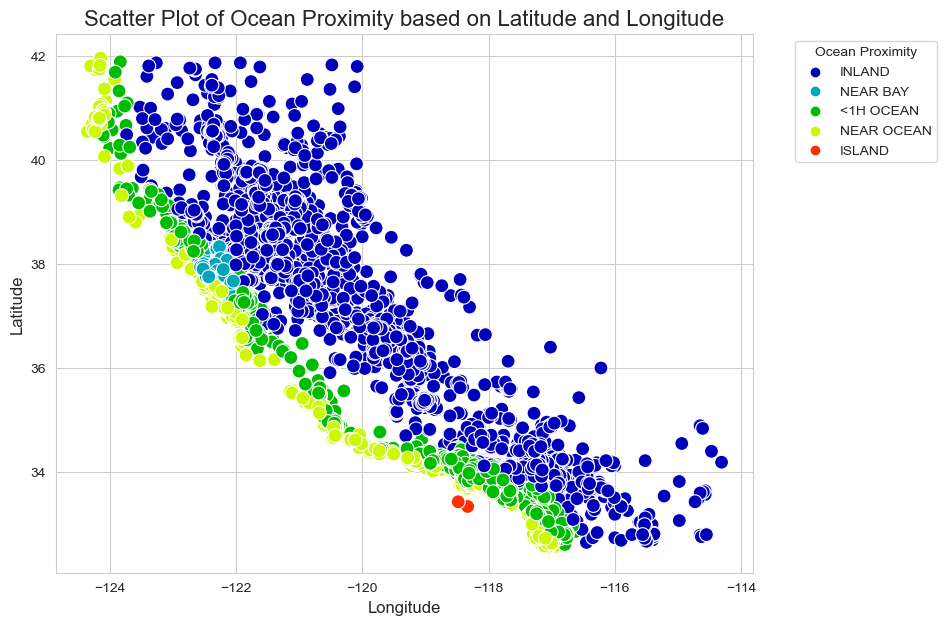

In [52]:
# Mapping Co-ordinate of Ocean Proximity

sns.set_style('whitegrid')

plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='ocean_proximity', 
                palette='nipy_spectral', legend='full', s=100)
plt.title('Scatter Plot of Ocean Proximity based on Latitude and Longitude', size=16)
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)
plt.legend(title='Ocean Proximity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

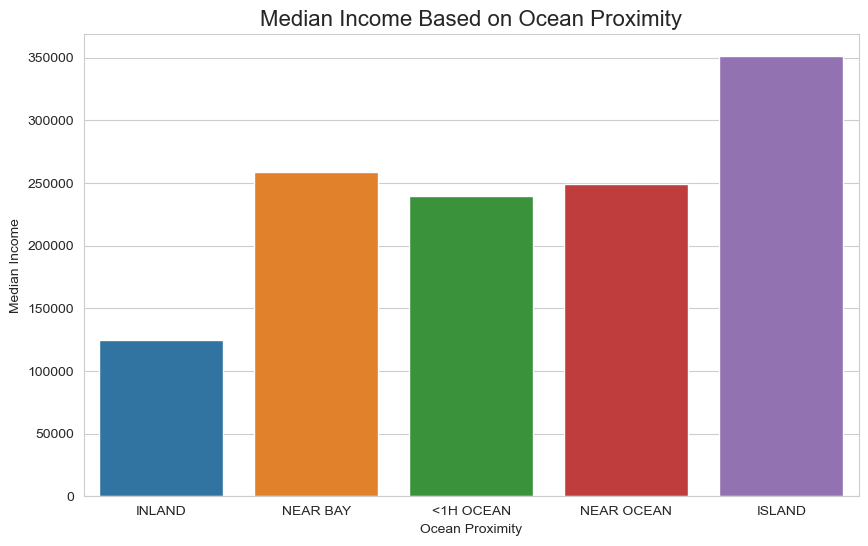

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='ocean_proximity', y='median_house_value', ci=None)
plt.title('Median Income Based on Ocean Proximity', size=16)
plt.xlabel('Ocean Proximity')
plt.ylabel('Median Income')
plt.show()

**Summary Ocean Proximity:**
- Terdapat 5 kategori lokasi properti di California yang diukur berdasarkan kedekatan properti dengan laut. Kategori tersebut adalah **INLAND**, **NEAR BAY**, **<1H OCEAN**, **NEAR OCEAN**, dan **ISLAND**.
- Jumlah rumah paling banyak ditemukan pada kategori <1H OCEAN dengan proporsi sebesar 44.02%. Diikutin INLAND sebesar 31.75%, NEAR OCEAN sebesar 12.96%, dan NEAR BAY sebesar 11.25%.
- Sedangkan rumah paling sedikit ditemukan pada kategori ISLAND dengan proporsi sebesar 0.01% atau hanya sebanyak 2 rumah. Karena jumlah yang terlalu sedikit untuk kategori ini, akan lebih baik data kategori ini di drop karena tidak dapat merepresentasikan housing value ISLAND yang sebenarnya.

### **Handling Anomaly**

Dikarenakan terdapat pengelompokkan data antara populasi (`population`) dan jumlah rumah tangga (`household`), perlu dilakukan pengecekan untuk memastikan jumlah `household` tidak melebihi jumlah `population` karena tidak mungkin jumlah keluarga melebihi populasi apabila menggunakan asumsi setiap `household` terdiri dari satu anggota keluarga saja.

In [54]:
df[df['population']<df['households']]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4980,-118.44,34.04,16.0,18.0,6.0,3.0,4.0,0.5360,<1H OCEAN,350000.0
7705,-121.00,37.65,17.0,484.0,202.0,198.0,204.0,0.6825,INLAND,187500.0


Data entries dimana `household` lebih dari `population` akan di drop karena dianggap sebagai anomali pada data.

In [55]:
df.drop(df[df['population']<df['households']].index, inplace=True)

### **Handling Missing Value**

Ditemukan data missing value sebesar 0.95% atau sebanyak 137 data pada kolom `total_bedrooms`, karena jumlahnya yang relatif kecil maka data missing value akan di drop.

In [56]:
# Drop Missing Value
df.dropna(subset='total_bedrooms', inplace=True)

### **Numerical Data**

In [57]:
# Statistical Description for Numerical Features
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,14309.0,-119.567128,2.006457,-124.3500,-121.8000,-118.4900,-118.0000,-114.3100
latitude,14309.0,35.631336,2.139630,32.5400,33.9300,34.2600,37.7200,41.9500
housing_median_age,14309.0,28.611363,12.606559,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,14309.0,2641.251730,2197.163022,2.0000,1452.0000,2125.0000,3142.0000,32627.0000
total_bedrooms,14309.0,538.321406,423.574443,1.0000,295.0000,435.0000,647.0000,6445.0000
population,14309.0,1424.957369,1151.769351,5.0000,784.0000,1164.0000,1722.0000,35682.0000
households,14309.0,499.535747,383.822526,1.0000,279.0000,410.0000,604.0000,6082.0000
median_income,14309.0,3.867229,1.890606,0.4999,2.5694,3.5403,4.7361,15.0001
median_house_value,14309.0,206784.497100,115406.114233,14999.0000,119400.0000,179900.0000,263700.0000,500001.0000


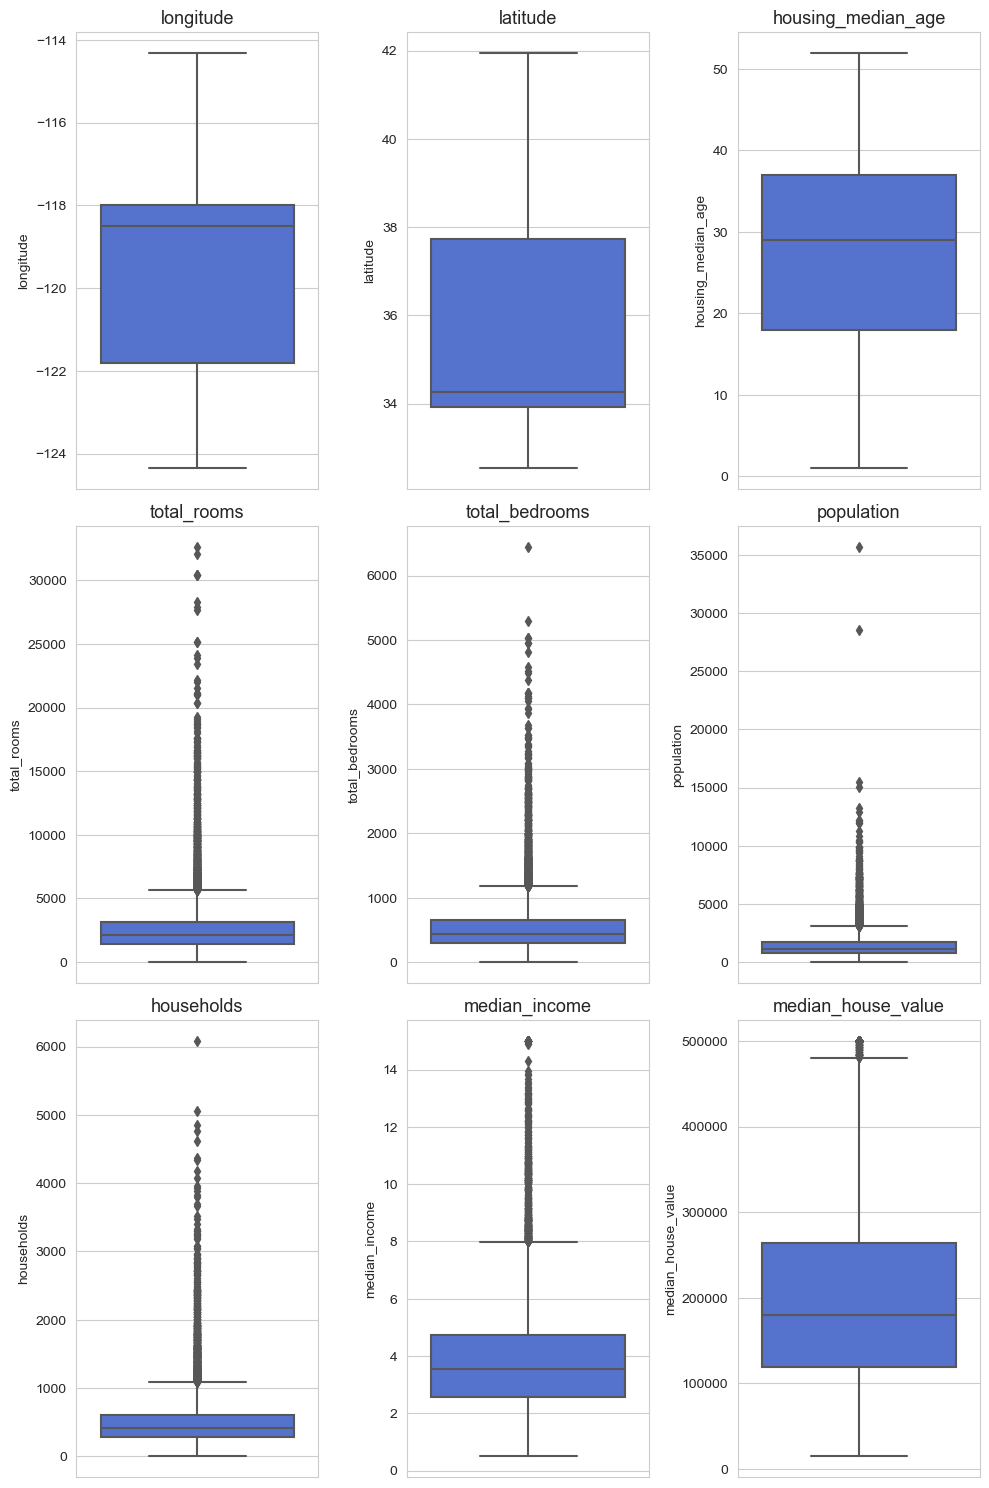

In [58]:
# Check Outliers

numerical_ft = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,15))
plt.subplots_adjust(wspace=0.5)

for i, col in enumerate(numerical_ft.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col], orient='v', color='royalblue')
    plt.title(col, size=13)

plt.tight_layout()
plt.show()

In [59]:
# Checkin on Outliers

def find_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile (0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    outliers = data[(data<lower_bound) | (data>upper_bound)]
    count_outliers = outliers.count()
    
    print(f'IQR: {iqr}')
    print(f'Lower Bound: {lower_bound}')
    print(f'Upper Bound: {upper_bound}')
    print(f'Total of Outliers: {count_outliers} \n')


In [60]:
for i in numerical_ft.columns:
    print('Checkin Outliers in Column:', i)
    check_outlier = find_outliers(df[i])

Checkin Outliers in Column: longitude
IQR: 3.799999999999997
Lower Bound: -127.5
Upper Bound: -112.30000000000001
Total of Outliers: 0 

Checkin Outliers in Column: latitude
IQR: 3.789999999999999
Lower Bound: 28.245
Upper Bound: 43.405
Total of Outliers: 0 

Checkin Outliers in Column: housing_median_age
IQR: 19.0
Lower Bound: -10.5
Upper Bound: 65.5
Total of Outliers: 0 

Checkin Outliers in Column: total_rooms
IQR: 1690.0
Lower Bound: -1083.0
Upper Bound: 5677.0
Total of Outliers: 905 

Checkin Outliers in Column: total_bedrooms
IQR: 352.0
Lower Bound: -233.0
Upper Bound: 1175.0
Total of Outliers: 879 

Checkin Outliers in Column: population
IQR: 938.0
Lower Bound: -623.0
Upper Bound: 3129.0
Total of Outliers: 822 

Checkin Outliers in Column: households
IQR: 325.0
Lower Bound: -208.5
Upper Bound: 1091.5
Total of Outliers: 834 

Checkin Outliers in Column: median_income
IQR: 2.1667000000000005
Lower Bound: -0.6806500000000009
Upper Bound: 7.986150000000001
Total of Outliers: 477 

C

In [92]:
outliers = df[
    (df['total_rooms'] > 5667.0) |
    (df['total_bedrooms'] > 1175.0) |
    (df['population'] > 3129.0) |
    (df['households'] > 1091.5) |
    (df['median_income'] > 7.986150000000001) |
    (df['median_house_value'] > 480150.0)
]

proporsi_outlier = round((outliers.shape[0]/df.shape[0])*100, 2)
print(f'Total Outlier pada data: {outliers.shape[0]}')
print(f'Persentasi Outlier: {proporsi_outlier}%')

Total Outlier pada data: 2081
Persentasi Outlier: 14.54%


**Summary Outliers:**
1. Sebanyak 3 kolom numerikal yaitu `latitude`, `longitude`, dan `housing_median_age` tidak memiliki outliers.
2. Sedangkan 6 kolom numerikal lainnya yaitu `total_rooms`, `total_bedrooms`, `population`, `households`, `median_indome` dan `median_house_value` memiliki outliers yang cukup besar dengan proporsi sebesar 14.54%.
3. Pada kolom `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income` memiliki anomali berupa nilai ekstrim yang menimbulkan outliers. Namun dengan asumsi adanya bahwa jumlah ruangan, populasi hingga rumah tangga yang mungkin saja dapat berbeda pada suatu wilayah, maka outlier pada kolom tersebut tidak akan dihapuskan. 
4. Kolom `median_house age` yang menjadi target prediksi nilai rumah akan dilakukan pembersihan outliers sebanyak 751 baris data.

### **Handling Outlier**

In [ ]:
df_clean = df

In [64]:
# Drop Outliers form Median House Value Column
df_clean = df_clean.drop(df_clean[df_clean['median_house_value']>480150.0].index)

In [94]:
rows_before = df.shape[0]
rows_after = df_clean.shape[0]

print(f'Jumlah data sebelum membersihkan outlier: {rows_before}')
print(f'Jumlah data setelah membersihkan outlier: {rows_after}')

Jumlah data sebelum membersihkan outlier: 14309
Jumlah data setelah membersihkan outlier: 13556


Dari jumlah baris data sebanyak **14.309** yang masih berisi outliers dan di drop hingga menjadi **13.556** atau estimasi sebanyak 751 baris data yang di drop dan merupakan bagian dari outliers pada target modelling.

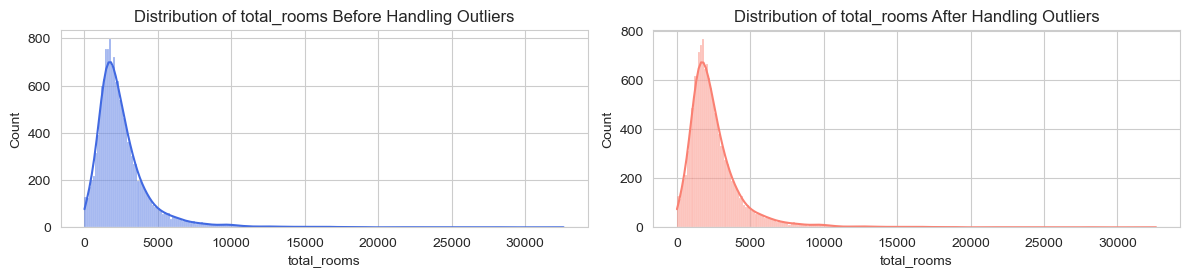

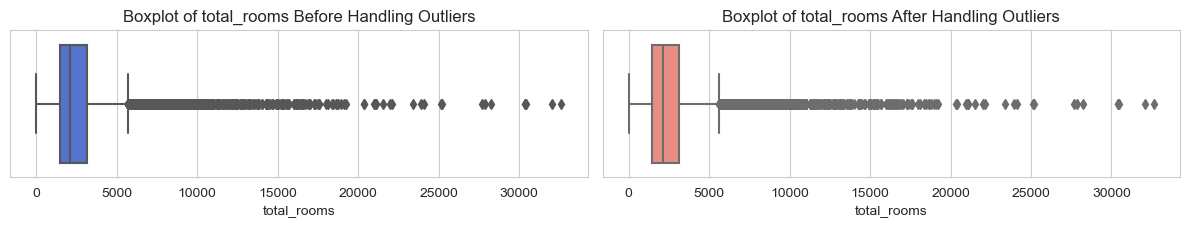

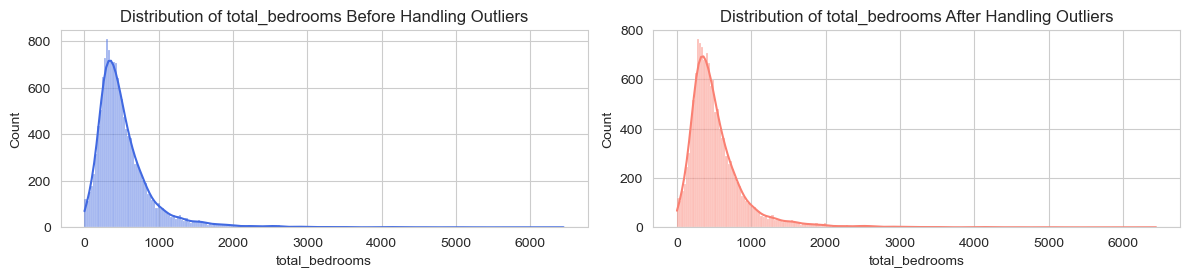

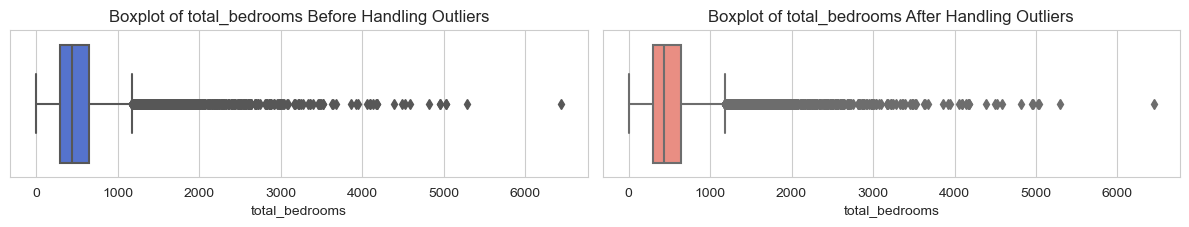

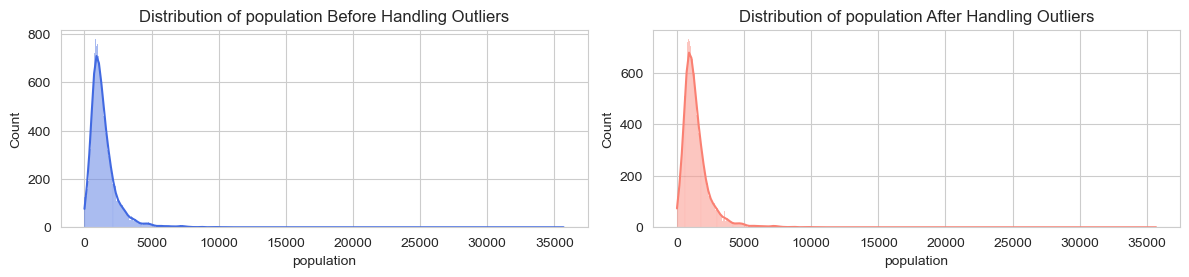

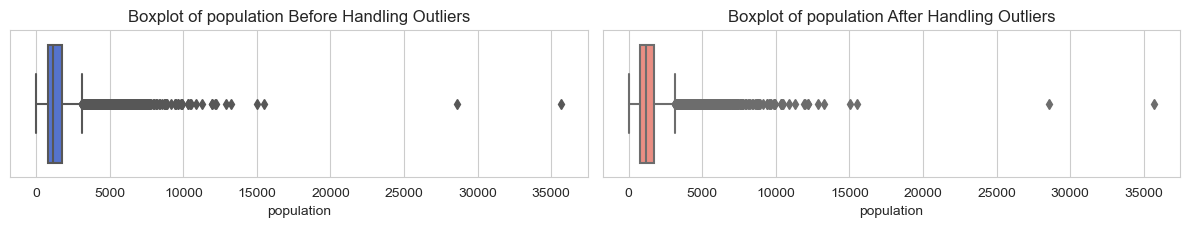

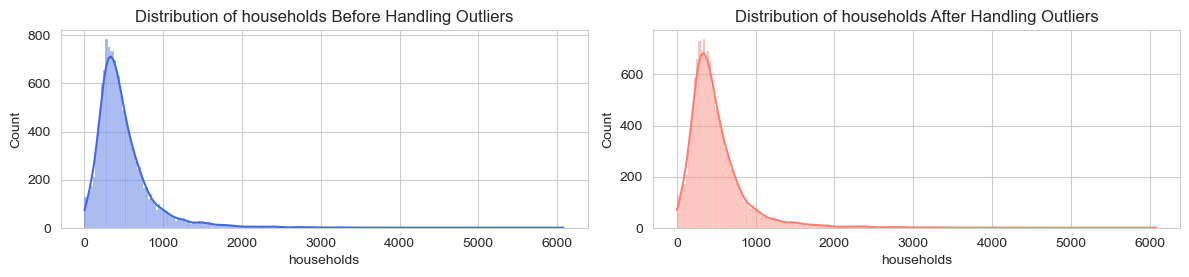

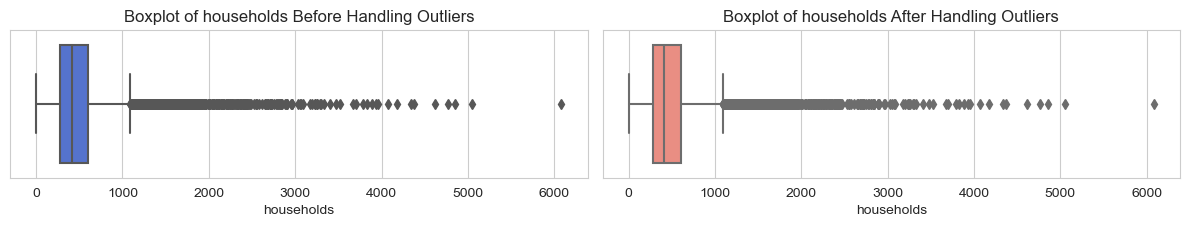

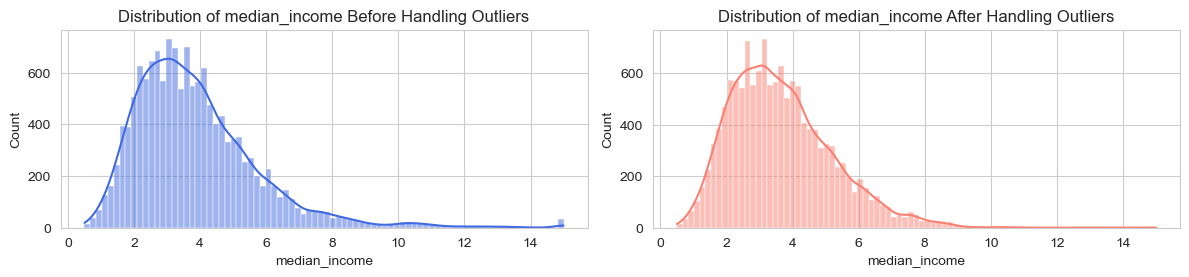

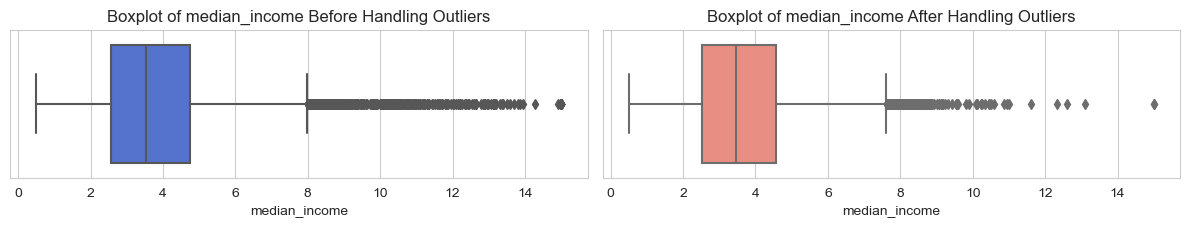

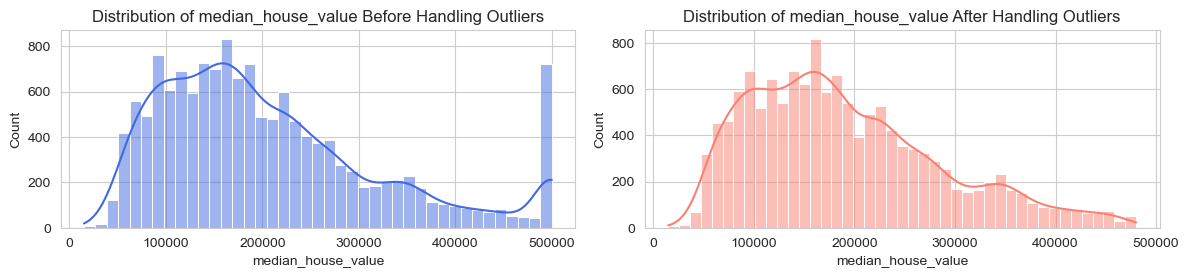

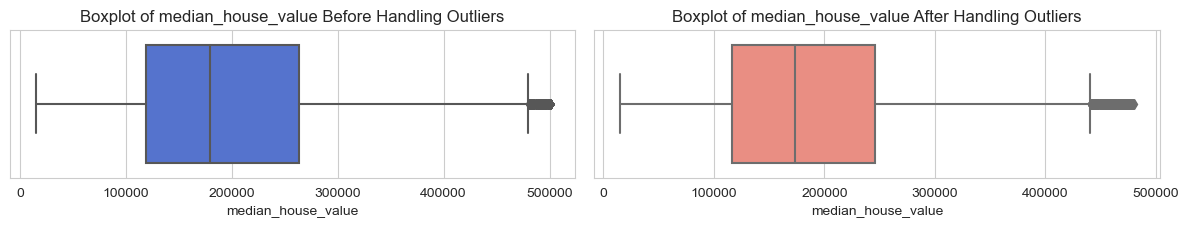

In [95]:
for i in numerical_ft.drop(columns=['longitude', 'latitude', 'housing_median_age']):
    sns.set_style('whitegrid')

    plt.figure(figsize=(12, 5))

    # Plot histograms
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x=i, kde=True, color='royalblue')
    plt.title(f"Distribution of {i} Before Handling Outliers")

    plt.subplot(2, 2, 2)
    sns.histplot(data=df_clean, x=i, kde=True, color='salmon')
    plt.title(f"Distribution of {i} After Handling Outliers")
    plt.tight_layout()

    # Plot boxplots
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 2, 3)
    sns.boxplot(data=df, x=i, color='royalblue')
    plt.title(f"Boxplot of {i} Before Handling Outliers")

    plt.subplot(2, 2, 4)
    sns.boxplot(data=df_clean, x=i, color='salmon')
    plt.title(f"Boxplot of {i} After Handling Outliers")

    plt.tight_layout()
    plt.show()

#### **Correlation Matrix**

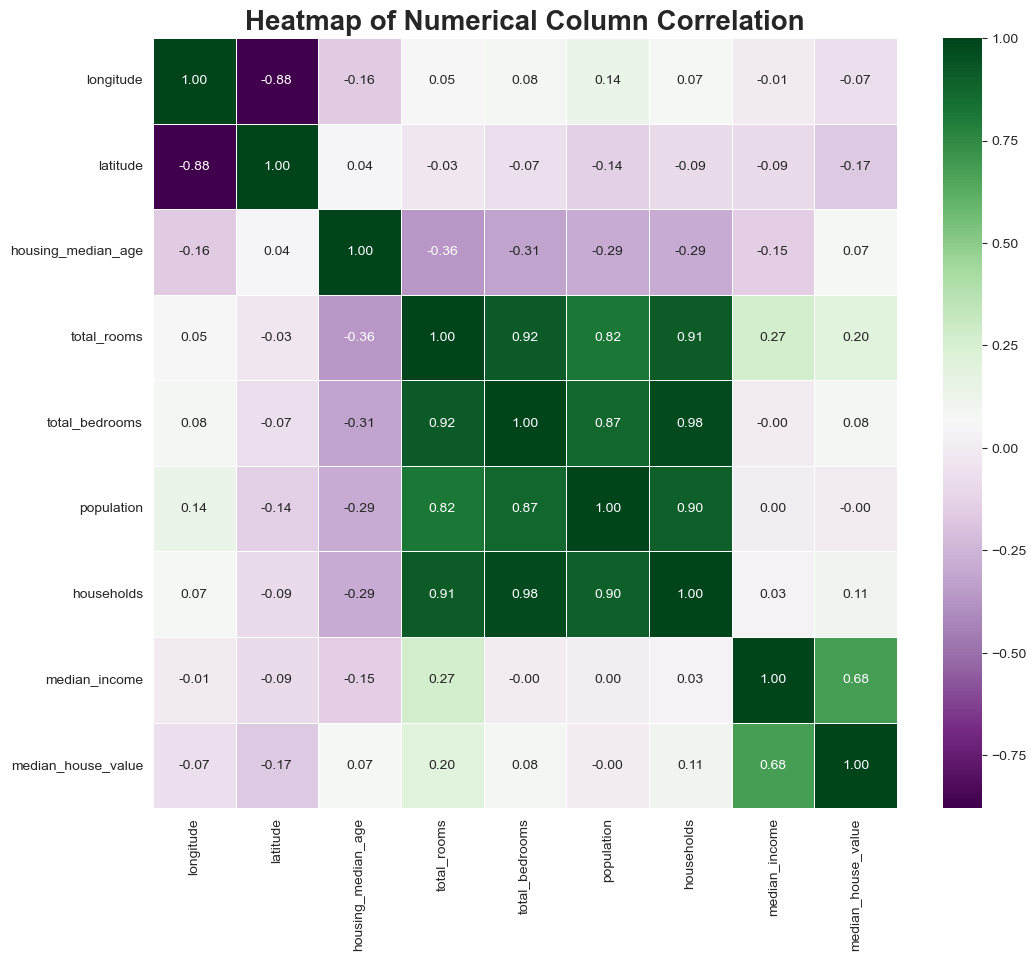

In [158]:
# Check on Correlation with Heatmap

def heatmap_corr(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr(method='spearman')

    plt.figure(figsize=(12,10))
    sns.heatmap(corr_matrix, cmap='PRGn', annot=True, fmt='.2f', linewidths=0.5)

    plt.title('Heatmap of Numerical Column Correlation', fontweight='bold', size=20)
    plt.show()

heatmap_corr(df)

Dengan target `median_house_value`, dapat dilihat korelasi kolom tersebut dengan kolom lainnya dalam dataset berikut. Diketahui bahwa `median_house_value` memiliki korelasi positif dengan kolom `median_income` dengan besar nilai korelasi 0.65.

Dibanding dengan kolom lainnya korelasi yang dihasilkan bernilai cukup rendah. Sedangkan untuk kolom `longitude` dan `latitude` memiliki pengaruh negatif terhadap `median_house_value` sehingga kedua kolom tidak akan dijadikan sebagai feature untuk melakukan modelling.

### **Categorical Value**

In [68]:
# Check Unique Values and Count Values in Categorical Features
ocean = df_clean['ocean_proximity'].value_counts().reset_index()
ocean['proportion'] = ocean['count']/ocean['count'].sum()*100
ocean

,ocean_proximity,count,proportion
0,<1H OCEAN,5890,43.442986
1,INLAND,4525,33.375129
2,NEAR OCEAN,1689,12.457590
3,NEAR BAY,1452,10.709544
4,ISLAND,2,0.014751


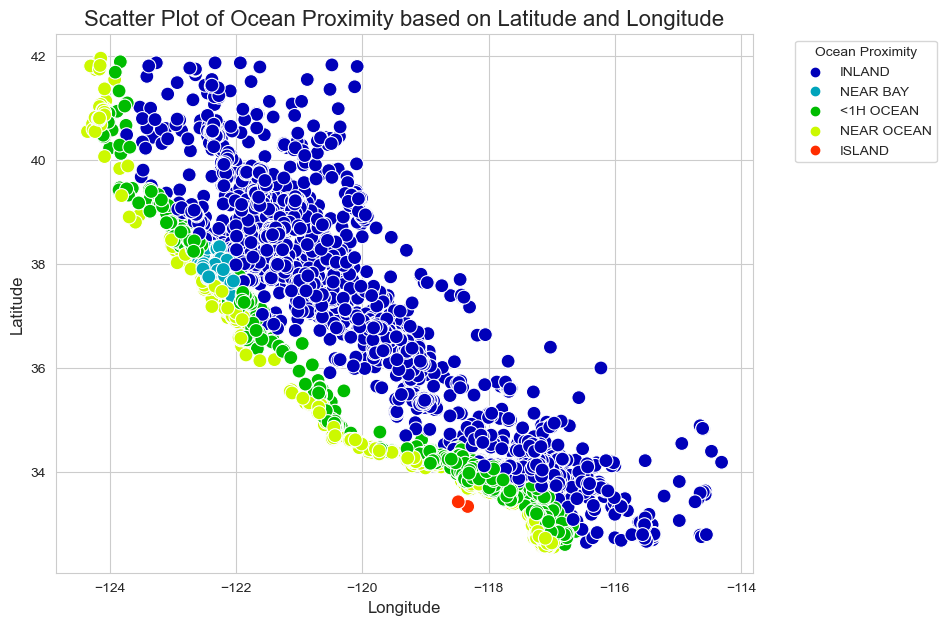

In [69]:
# Mapping Co-ordinate of Ocean Proximity

sns.set_style('whitegrid')

plt.figure(figsize=(9,7))
sns.scatterplot(data=df_clean, x='longitude', y='latitude', hue='ocean_proximity', 
                palette='nipy_spectral', legend='full', s=100)
plt.title('Scatter Plot of Ocean Proximity based on Latitude and Longitude', size=16)
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)
plt.legend(title='Ocean Proximity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Summary Ocean Proximity:**
- Terdapat 5 kategori lokasi properti di California yang diukur berdasarkan kedekatan properti dengan laut. Kategori tersebut adalah INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, dan ISLAND.
- Jumlah rumah paling banyak ditemukan pada kategori <1H OCEAN dengan proporsi sebesar 43%. Diikutin INLAND sebesar 33%, NEAR OCEAN sebesar 12.63%, dan NEAR BAY sebesar 10.96%.
- Sedangkan rumah paling sedikit ditemukan pada kategori ISLAND dengan proporsi sebesar 0.01% atau hanya sebanyak 2 rumah. Karena jumlah yang terlalu sedikit untuk kategori ini, akan lebih baik data kategori ini di drop karena tidak dapat merepresentasikan housing value ISLAND yang sebenarnya.

In [70]:
df_clean = df_clean[df_clean['ocean_proximity'] != 'ISLAND']

## **Modelling**

In [74]:
# Libraries

# Preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

### **Feature Engineering**

Pada dataset beriku memiliki dua jenis data, yaitu numerikal dan kategorik. Feature engineering yang dapat dilakukan agar data dapat diproses ke dalam model adalah sebagai berikut:

1. **Encoding** (data kategorikal)
   
    One-Hot Encoding (OHE) : `ocean_proximity`

2. **Scalling** (data numerikal)

    Robust Scaler: `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, `median_house_value`, `latitude`, `longitude`

In [96]:
transform = ColumnTransformer([
    ('OHE', OneHotEncoder(drop='first', handle_unknown='ignore'), ['ocean_proximity']),
    ('Robust Scaler', RobustScaler(), ['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households', 'housing_median_age', 'median_income'])
], remainder='passthrough')

transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['ocean_proximity']),
                                ('Robust Scaler', RobustScaler(),
                                 ['longitude', 'latitude', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'housing_median_age', 'median_income'])])

#### **Data Splitting**

In [76]:
# Define the X and Y 
x = df_clean.drop(columns=['median_house_value'], axis=1)
y = df_clean['median_house_value']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=23
)

In [77]:
# Define Model
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
linreg = LinearRegression()
svr = SVR()
xgb = XGBRegressor()

models = [knn, tree, rf, linreg, svr, xgb]

# Metrics
mape_mean = []
mape_std = []

mae_mean = []
mae_std = []

rmse_mean = []
rmse_std = []

kfold = KFold(n_splits=5, random_state=23, shuffle=True)

# Pipeline and Cross Validation on Metrics
results = []
for model in models:
    estimator = Pipeline([
        ('preprocessing', transform),
        ('scaler', RobustScaler()),
        ('model', model)
    ])
    
    # Cross Validation on Metrics
    crossval_mape = cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=kfold,
        scoring='neg_mean_absolute_percentage_error',
    )
    mape_mean.append(crossval_mape.mean())
    mape_std.append(crossval_mape.std())

    crossval_mae = cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=kfold,
        scoring='neg_mean_absolute_error',
    )
    mae_mean.append(crossval_mae.mean())
    mae_std.append(crossval_mae.std())

    crossval_rmse = cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=kfold,
        scoring='neg_root_mean_squared_error',
    )
    rmse_mean.append(crossval_rmse.mean())
    rmse_std.append(crossval_rmse.std())

# Create DataFrame
crossval_model = pd.DataFrame({
    'Model': ['KNN Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'Linear Regression', 'SVR', 'XGBoost Regressor'],
    'Mean MAPE': mape_mean,
    'Std MAPE': mape_std,
    'Mean MAE': mae_mean,
    'Std MAE': mae_std,
    'Mean RMSE': rmse_mean,
    'Std RMSE': rmse_std
})

crossval_model.sort_values('Mean MAPE', ascending=False)

,Model,Mean MAPE,Std MAPE,Mean MAE,Std MAE,Mean RMSE,Std RMSE
5,XGBoost Regressor,-0.177436,0.005204,-29883.356271,958.973498,-43669.985096,1240.482291
2,Random Forest Regressor,-0.185972,0.002996,-31049.897640,874.831005,-45189.141134,1572.111173
0,KNN Regressor,-0.231404,0.005444,-39271.607703,1233.255059,-55144.859091,2015.296772
1,Decision Tree Regressor,-0.249674,0.010151,-42142.354630,1230.566002,-62559.241076,2239.142489
3,Linear Regression,-0.271310,0.004489,-43751.159742,270.709235,-59261.008653,1240.351903
4,SVR,-0.499821,0.009623,-74714.953411,876.399271,-95873.589234,1346.751785


Pada kasus ini, metric utama yang digunakan untuk melihat kinerja suatu model regresi adalah MAPE. MAPE melihat mengukur persentase nilai kesalahan rata-rata yang error dengan nilai sebenarnya yang diprediksi. 

Jika dilihat dari rata-rata MAPE secara keseluruhan, model XGBoost dan Random Forest memiliki nilai yang dibawah 20%. **XGBoost** memiliki rata-rata MAPE sebesar 17.74%, sedangkan **Random Forest** memiliki rata-rata MAPE sebesar 18.59%

### **Predict To Test With Best Benchmark Model**

In [78]:
best_model = {
    'XGBoost' : XGBRegressor(),
    'RandomForest' : RandomForestRegressor()
}

mape_score = []
mae_score = []
rmse_score = []

for i in best_model :
    model = Pipeline([
        ('preprocessing', transform),
        ('scaler', RobustScaler()),
        ('model', best_model[i])
    ])
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mape_score.append(mean_absolute_percentage_error(y_test, y_pred))
    mae_score.append(mean_absolute_error(y_test, y_pred))
    rmse_score.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    

In [79]:
predict_best_model = pd.DataFrame({
    'Best Model' : ['XGBoost', 'RandomForest'],
    'MAPE' : mape_score,
    'MAE' : mae_score,
    'RMSE' : rmse_score
})

predict_best_model

,Best Model,MAPE,MAE,RMSE
0,XGBoost,0.177594,30260.494638,45207.277707
1,RandomForest,0.178433,30990.906763,45895.386621


Setelah dilakukan predict test pada data test, model XGBoost memiliki milai MAPE yang lebih rendah dari RandomForest sebesar 17.77% sedangkan RandomForest sebesar 17.84% yang memiliki MAPE dibawah 20%.

Karena kedua model tersebut memiliki metric MAPE yang cukup baik, dengan tujuan menciptakan model terbaik dengan metric evaluasi serendah mungkin maka XGBoost dan Random Forest akan dilakukan proses tuning.

### **Hyperparameter Tuning: XGBoost Regressor**

In [135]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=23, verbosity=0)

max_depth = list(np.arange(1, 16))
learning_rate = list(np.arange(1, 100)/100)
n_estimators = list(np.arange(100, 201))
subsample = list(np.arange(2, 10)/10)
gamma = list(np.arange((1/10)/11))
colsample_bytree = list(np.arange(1, 10)/10)
reg_alpha = list(np.logspace(-3, 1, 10)) 

hyperparamaeter_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

estimator_xgb = Pipeline([
        ('preprocessing', transform),
        ('scaler', RobustScaler()),
        ('model', xgb)
        ])

random_search_xgb = RandomizedSearchCV(
    estimator= estimator_xgb,
    param_distributions = hyperparamaeter_xgb, 
    n_iter = 200,
    cv = kfold, 
    scoring = 'neg_mean_absolute_percentage_error',
    n_jobs = -1,
    refit = True,
    random_state = 23  
)

random_search_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OHE',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity']),
                                                                              ('Robust '
                                                                               'Scaler',
                                                                               RobustScaler(),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                '...
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...],
                                        'model__reg_alpha': [0.001,
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=23,
                   scoring='neg_mean_absolute_percentage_error')

In [136]:
print('MAPE XGB After Tuning:', -random_search_xgb.best_score_)

MAPE XGB After Tuning: 0.17530200281212321


### **Hyperparameter Tuning: RandomForest Regressor**

In [ ]:
from scipy.stats import randint

# Define RandomForestRegressor
rf = RandomForestRegressor(random_state=23)

# Define hyperparameters
param_dist = {
    'model__n_estimators': randint(100, 201),
    'model__max_depth': randint(3, 11),
    'model__min_samples_split': randint(2, 11),
    'model__min_samples_leaf': randint(1, 11),
    'model__bootstrap': [True, False]
}

# Create Pipeline
estimator_rf = Pipeline([
    ('preprocessing', transform),
    ('scaler', RobustScaler()),
    ('model', rf)
])

# RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=estimator_rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=kfold,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    verbose=1,
    refit=True,
    random_state=1
)

# Fit RandomizedSearchCV
random_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OHE',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity']),
                                                                              ('Robust '
                                                                               'Scaler',
                                                                               RobustScaler(),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                '...
                                        'model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000299A1660110>,
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000299A18F8C50>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000299A18AF950>},
                   random_state=1, scoring='neg_mean_absolute_percentage_error',
                   verbose=1)

In [137]:
print('MAPE RandomForest After Tuning:', -random_search_rf.best_score_)

MAPE RandomForest After Tuning: 0.2035366250752948


### **Comparing Metrics Result Training Dataset Before After Tunning**

In [130]:
# Model XGB - Before Tunning
xgb_before = predict_best_model.loc[predict_best_model['Best Model'] == 'XGBoost', 'MAPE'].values[0]
xgb_after = -random_search_xgb.best_score_

print(f'MAPE Model XGBoost Before Tuned: {xgb_before.round(4)}')
print(f'MAPE Model XGBoost After Tuned: {xgb_after.round(4)}')

MAPE Model XGBoost Before Tuned: 0.1776
MAPE Model XGBoost After Tuned: 0.1753


In [131]:
# Model Random Forest - Before Tunning
rf_before = predict_best_model.loc[predict_best_model['Best Model'] == 'RandomForest', 'MAPE'].values[0]
rf_after = -random_search_rf.best_score_

print(f'MAPE Model XGBoost Before Tuned: {rf_before.round(4)}')
print(f'MAPE Model XGBoost After Tuned: {rf_after.round(4)}')

MAPE Model XGBoost Before Tuned: 0.1784
MAPE Model XGBoost After Tuned: 0.2035


### **Evaluating Best Model After Tuned to Data Test**

In [138]:
# Best Hyperparameter and Model
best_params_xgb = random_search_xgb.best_params_
best_model_xgb = random_search_xgb.best_estimator_

# Evaluate Best Model
y_pred_xgb = best_model_xgb.predict(x_test)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print('Best Hyperparameters:', best_params_xgb)

xgb_tuned = pd.DataFrame({
    'Model Tuned' : ['XGBoost Regressor'],
    'MAPE' : mape_xgb,
    'MAE' : mae_xgb,
    'RMSE' : rmse_xgb
})

xgb_tuned

Best Hyperparameters: {'model__subsample': 0.7, 'model__reg_alpha': 3.593813663804626, 'model__n_estimators': 162, 'model__max_depth': 7, 'model__learning_rate': 0.06, 'model__gamma': 0.0, 'model__colsample_bytree': 0.9}


,Model Tuned,MAPE,MAE,RMSE
0,XGBoost Regressor,0.17207,29541.038495,43797.013502


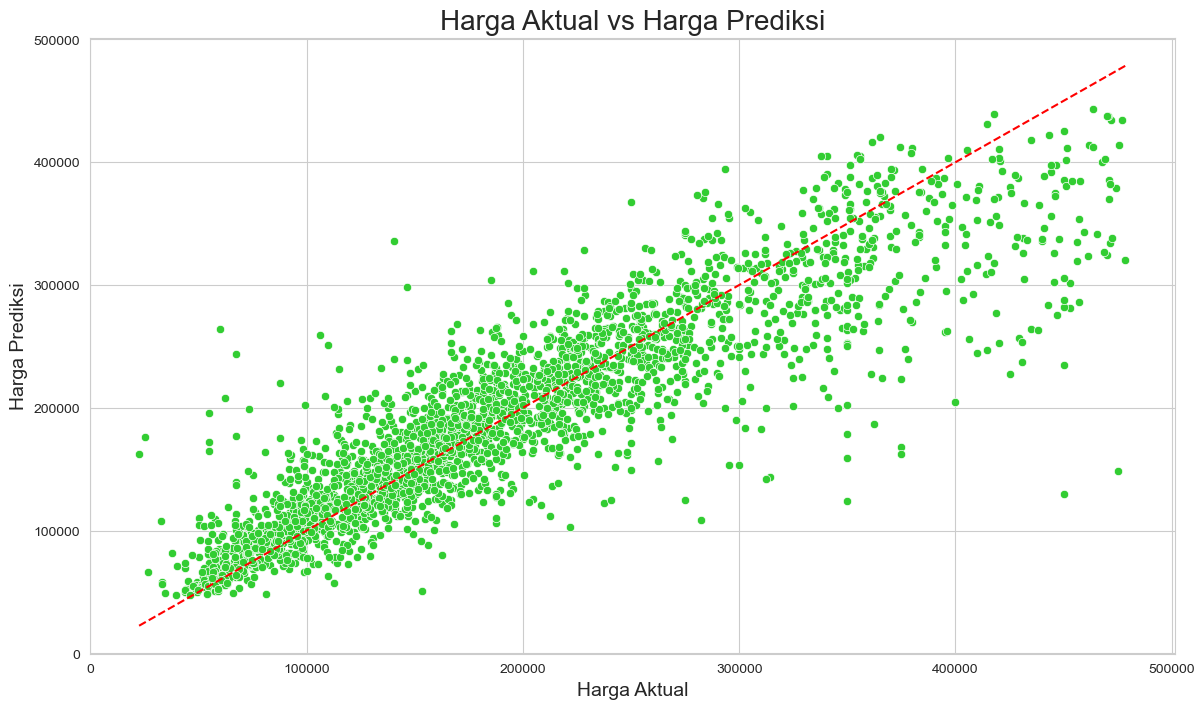

In [153]:
plt.figure(figsize=(14,8))

sns.scatterplot(x=y_test, y=y_pred_xgb, color='limegreen')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Harga Aktual vs Harga Prediksi', size=20)
plt.xlabel('Harga Aktual', size=14)
plt.ylabel('Harga Prediksi', size=14)

plt.show()

Dari grafik tersebut, dipahami bahwa perbandingan antara nilai harga yang diprediksi dengan harga aktual terlihat cukup baik hingga membentuk pola yang linear. Akan tetapi masih ditemukan sejumlah error dimana suatu prediksi bernilai lebih rendah dari nilai aktualnya, dikarenakan model memiliki tingkat error sebesar 17.2%. Terlihat dari pola prediksi diatas dimana model memliki kelemahan untuk memprediksi harga rumah yang relatif mahal.

Menurut Lewis (1982), rentang nilai metrics MAPE dari 10% hingga 20% dikategorikan sebagai 'Good Forecast'.

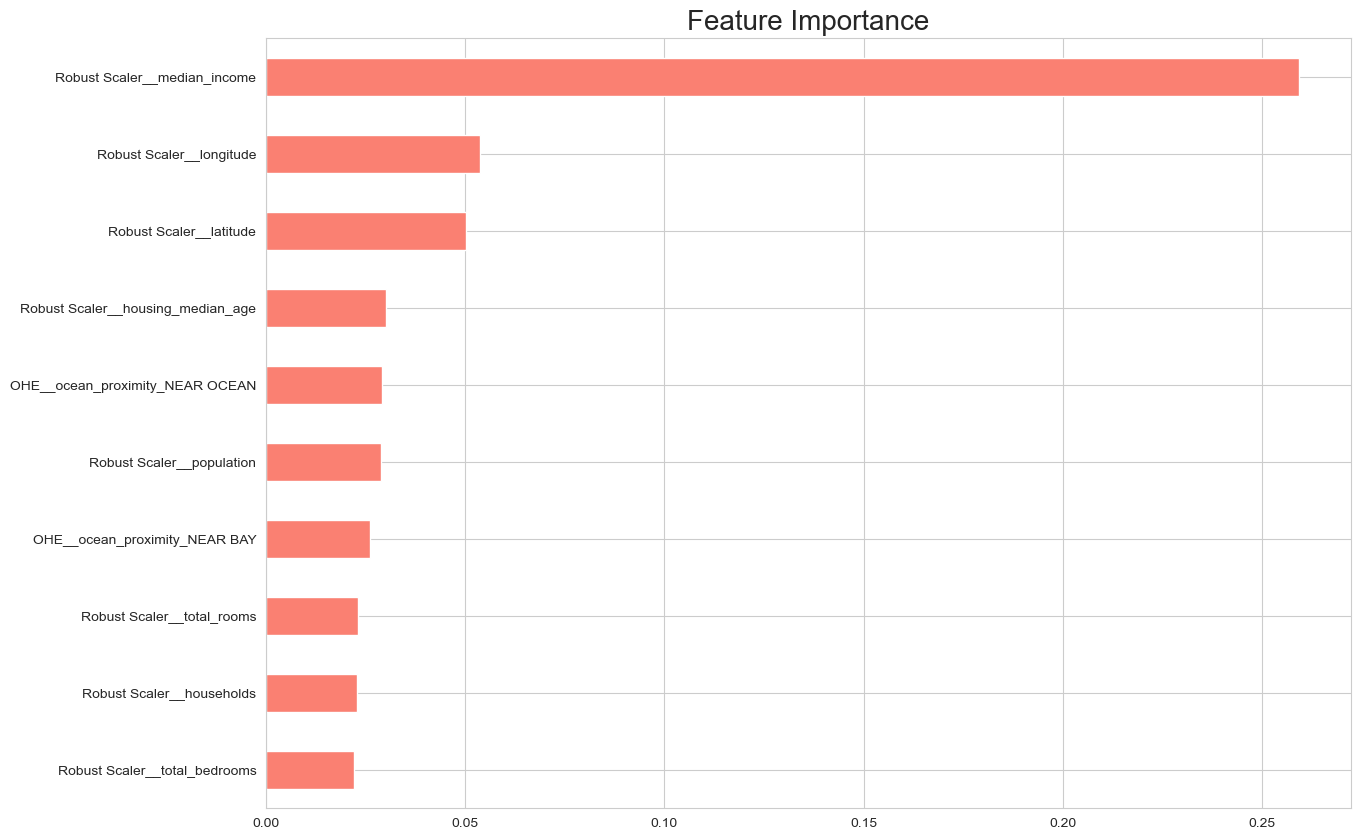

In [163]:
# Plot feature importances
plt.figure(figsize=(14,10))
feature_importance_xgb = pd.Series(best_model_xgb['model'].feature_importances_, transform.get_feature_names_out()).sort_values().head(10)
feature_importance_xgb.plot(kind='barh', title='Feature Importances', color='salmon');

plt.title('Feature Importance', size=20)
plt.show()

## **Conclusion**
- Berdasarkan metrics evaluasi yang digunakan, model regresi XGBoost merupakan model terbaik dalam memprediksi harga rumah di California.
- Fitur yang memiliki pengaruh dalam memprediksi harga rumah di California adalah median_income
- Dengan score MAPE sebesar 17.53% yang termasuk ke dalam kategori Good Forecast

## **Recommendation**
- Melakukan pembaruan dataset agar dapat memprediksi menggunakan data terbarukan
- Membuat atau menambahkan fitur lainnya yang dapat mempengaruhi harga rumah secara lebih baik.

## **Save Model**

In [165]:
import pickle

pipe_model = Pipeline([
    ('preprocess', transform),
    ('model', XGBRegressor())
])

pipe_model.fit(x_train, y_train)

pickle.dump(pipe_model,open('data_california_house.sav', 'wb'))

file_name = 'data_california_house.sav'

loaded_model = pickle.load(open(file_name, 'rb'))